In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import validation_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

## Loading Data:

In [2]:
data= pd.read_csv('data/news_dataset_v3_FE.csv')

In [3]:
os.listdir('data/')

['cleaned_news_dataset.csv',
 'news_dataset_v1.csv',
 'news_dataset_v3_FE.csv',
 'stop_words.pickle',
 'test.pickle',
 'test_y.pickle',
 'theasianage.csv',
 'theguardian.csv',
 'thehindu.csv',
 'themint.csv',
 'train.pickle',
 'train_x_text.pickle',
 'train_y.pickle',
 'train_y_text.pickle',
 'val_x_text.pickle',
 'val_y_text.pickle']

In [4]:
train_x= pd.read_pickle('data/train.pickle')
train_y= pd.read_pickle('data/train_y.pickle')

val_x= pd.read_pickle('data/test.pickle')
val_y= pd.read_pickle('data/test_y.pickle')

## Checking Performance of  Support Vector Machine using Default Parameters:

In [5]:
from sklearn.svm import SVC
sv= SVC(C=1)

## Default Parameters:

In [6]:
sv.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Training:

In [7]:
sv.fit(train_x,train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=1)

##  Testing on Training data and Validation data:

In [8]:
answer= sv.predict(train_x)
answer2= sv.predict(val_x)

## Slight Overfittness

In [9]:
#svc=1
print('Training Score: ',accuracy_score(train_y,answer)*100,'%')
print('Testing Score: ',accuracy_score(val_y,answer2)*100,'%')

Training Score:  99.7355896351137 %
Testing Score:  93.7125748502994 %


In [10]:
sv.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [11]:
C= np.round(np.linspace(0.5,5,30,),1)
C_values=[]
train_error=[]
testing_error=[]
for c in C:
    sv= SVC(C=c)
    sv.fit(train_x,train_y)
    answer= sv.predict(train_x)
    answer2= sv.predict(val_x)
    #svc=1
    C_values.append(c)
    train_error.append(accuracy_score(train_y,answer)*100)
    testing_error.append(accuracy_score(val_y,answer2)*100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [12]:
import plotly.graph_objects as go
fig= go.Figure()
fig.add_trace(
    go.Scatter(x= np.arange(len(C_values)),
               y= [100- num for num in train_error],
                name='train_error'
)
)
fig.add_trace(
    go.Scatter(x= np.arange(len(C_values)),
               y= [100 - nu for nu in testing_error],
               name='testing_error'
              )
)



fig.show(renderer='browser')

In [13]:
print(classification_report(answer2,val_y))

               precision    recall  f1-score   support

     business       0.95      0.91      0.93        85
entertainment       0.94      0.90      0.92        51
     politics       0.90      0.96      0.93        68
        sport       0.99      1.00      0.99        71
         tech       0.93      0.95      0.94        59

     accuracy                           0.94       334
    macro avg       0.94      0.94      0.94       334
 weighted avg       0.94      0.94      0.94       334



## Confusion Matrix:

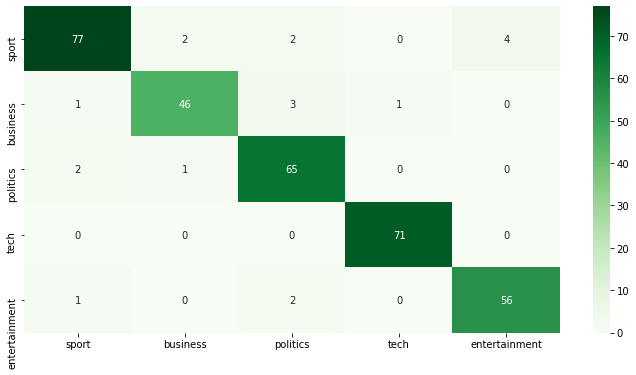

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
cat= data['category'].value_counts().index
sns.heatmap(confusion_matrix(answer2,val_y),xticklabels=cat, yticklabels= cat,annot=True,fmt='g',cmap='Greens')

## Performing Hyperparameter tuning using Randomized Search CV and Grid Search CV

In [15]:
# # C
# C = [.0001, .001, .01]

# # kernel
# kernel = ['linear', 'rbf', 'poly']


# # Create the random grid
# random_grid = {'C': C,
#               'kernel': kernel,
#              }

# print(random_grid)
# C
C = [.0001, .001, .01]

# gamma
gamma = [.0001, .001, .01, .1, 1, 10, 100]

# degree
degree = [1, 2, 3, 4, 5]

# kernel
kernel = ['linear', 'rbf', 'poly']

# probability
probability = [True]

# Create the random grid
random_grid = {'C': C,
              'kernel': kernel,
              'gamma': gamma,
              'degree': degree,
              'probability': probability
             }

In [16]:
svc = SVC(random_state=8)


random_search = RandomizedSearchCV(estimator=svc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(train_x, train_y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.

RandomizedSearchCV(cv=3, estimator=SVC(random_state=8), n_iter=50,
                   param_distributions={'C': [0.0001, 0.001, 0.01],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100],
                                        'kernel': ['linear', 'rbf', 'poly'],
                                        'probability': [True]},
                   random_state=8, scoring='accuracy', verbose=1)

In [26]:
random_search.best_params_

{'probability': True, 'kernel': 'poly', 'gamma': 10, 'degree': 4, 'C': 0.01}

In [27]:
random_search.best_score_

0.9026983288472987

In [28]:
model= random_search.best_estimator_

In [29]:
model

SVC(C=0.01, degree=4, gamma=10, kernel='poly', probability=True, random_state=8)

In [30]:
answer1= model.predict(train_x)
print('Training Score : {}%'.format(accuracy_score(train_y,answer1)*100))

answer2= model.predict(val_x)
print('Testing Score : {}%'.format(accuracy_score(val_y,answer2)*100))

Training Score : 100.0%
Testing Score : 89.82035928143712%


In [31]:
print(classification_report(answer2,val_y))

               precision    recall  f1-score   support

     business       0.98      0.75      0.85       105
entertainment       0.80      0.97      0.88        40
     politics       0.78      0.97      0.86        58
        sport       0.99      0.95      0.97        75
         tech       0.92      0.98      0.95        56

     accuracy                           0.90       334
    macro avg       0.89      0.92      0.90       334
 weighted avg       0.91      0.90      0.90       334



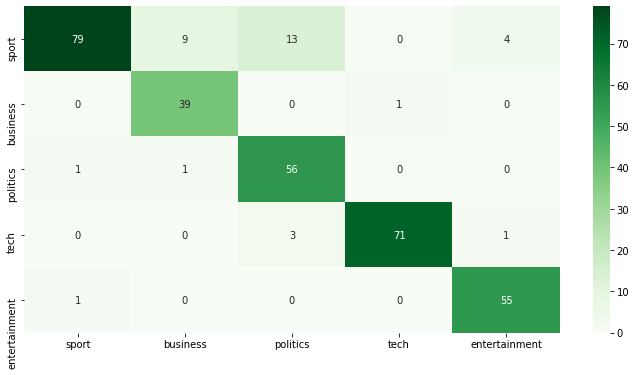

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
cat= data['category'].value_counts().index
sns.heatmap(confusion_matrix(answer2,val_y),xticklabels=cat, yticklabels= cat,annot=True,fmt='g',cmap='Greens')

In [33]:
d = {
     'Model': 'SVM',
     'Training Set Accuracy': accuracy_score(train_y,answer1)*100,
     'Test Set Accuracy': accuracy_score(val_y,answer2)*100
}

df_models_svc = pd.DataFrame(d, index=[0])
df_models_svc

,Model,Training Set Accuracy,Test Set Accuracy
0,SVM,100.0,89.820359


In [34]:
import pickle
with open('Models/best_svc.pickle', 'wb') as output:
    pickle.dump(model, output)
    
with open('Models/df_models_svc.pickle', 'wb') as output:
    pickle.dump(df_models_svc, output)